# Variational Inference - An Insight into Probabilistic Optimization

This small piece of information shall give interested people a glimpse of Variational Inference an Probabilistic Models. 
It can be seen as a small starter. In case you get more appetite take a look into the references. :)

__Contents__
1. Jumping into Probabilistic Models
2. Variational Inference
3. CAVI-Algorithm
4. Example with a Gaussian Mixture Model


## Jumping into Probabilistic Models

From this point we start with some models you may have already heard and know about. We take a slight look into them, without using some math or diving into it deeply.

### Latent Dirichlet Allocation (LDA)
LDA is a probabilistic generative model for a distribution over topics of a given corpus $D$, for every single document $\vec{w}$. A topic in turn is a distribution over words $w$. The word vector (document) is used to infer distributions for topic mixture ($\theta$) and  the topic ($z$). The model assumes a joint probability distribution $p(\theta, z, \vec{w} | \alpha, \beta )$ over all these variables and uses __approximate inference__ to compute the joint distribution. In the end each document can be characterzed using the topic mixture $\theta$.
<p align="left">
 <img src="img/lda_graphic.png">
</p>

### Variational Autoencoder (VAR)
The VAR is a Deep Generative Model. It uses deep neural network architecture, in order to explain observable data. It does so by assuming a generation of the data by a probabilistic model. The dimensionality of the latent distributions $z$ are generally smaller than the dimensionality of the feature, in order to reveal valuable information. 
<p align="left">
 <img src="img/var.png">
</p>

*Code Example:*https://graviraja.github.io/vanillavae/#

### Gaussian Mixture Model (GMM)

*Keep this in mind*

<br>The random variable $x$ is generated by a normal distribution $N(c_i^T\mu, 1)$ and is dependend from the random variables $c_i$ an $\mu$. These are random variables themselves. 
<br>The model can be described as:

\begin{align*}
\mu_k &\sim N(0, \sigma^2)            & for \ k &= 1, ..., k \\
c_i &\sim Categorical(1/K, ..., 1/K)  & for \ i &= 1, ..., n \\
x_i | c_i, \mu &\sim N(c_i^T \mu, 1)  & for \ i &= 1, ..., n
\end{align*}

<p align="left">
 <img src="img/gmm.png">
</p>



          x  labels
0 -1.224966  dist_2
1  9.394422  dist_0
2  9.162527  dist_0
3  7.643303  dist_1
4  4.598528  dist_1
Drawn means:
[ 9.67415138  6.36743812 -1.6454365  -3.01443057]


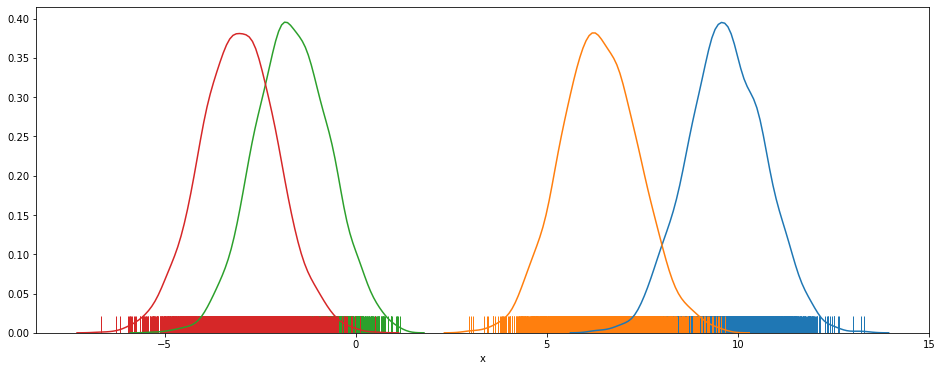

In [61]:
import numpy as np
import pandas as pd
# hyperparameters of P(mu)
k = 4
sigma_sq = 5
np.random.seed(1327)

# number of instances
i = 10000
c_probas = np.array([1/k]*k)

# construct probability model
mu = np.random.normal(0, sigma_sq, k)
c = np.random.multinomial(n=1, pvals=c_probas, size= i)
distribution_labels = [f"dist_{np.where(c[row, :] == 1)[0][0]}" for row in range(c.shape[0])]
x_mu = c.dot(mu)
x = np.array([np.random.normal(mu_value, 1, 1)[0] for mu_id, mu_value in enumerate(x_mu)])

gmm_set = pd.DataFrame({"x": x, "labels": distribution_labels})

print(gmm_set.head(5))
import seaborn as sns
import matplotlib.pyplot as plt
print(f"Drawn means:\n{mu}")
plt.figure(figsize=(16, 6))
sns.distplot(gmm_set.loc[gmm_set["labels"] == "dist_0", "x"], hist=False, rug=True)
sns.distplot(gmm_set.loc[gmm_set["labels"] == "dist_1", "x"], hist=False, rug=True)
sns.distplot(gmm_set.loc[gmm_set["labels"] == "dist_2", "x"], hist=False, rug=True)
sns.distplot(gmm_set.loc[gmm_set["labels"] == "dist_3", "x"], hist=False, rug=True)

## Variational Inference

Above models have in common the existence of __latent variables__. Latent variables are unobservable and we have few or no information about them available. By nature information about those variables are encoded in the realisations of the underlying generative process. Meaning that we can infer parameters of the latent distributions only from observations those latent disributions create. Similar problems are often encountered in bayesian statistics and were solved in the past with __markov chain Monte Carlo methods__ (Gibbs Sampling) to approximate latent distributions/posterior distributions. Their convergence generally takes very long, but is very precise. __Variational Inference (VI)__ is another approach for solving the same problem, it is __easier to scale__ and __converges faster__, but has been studied less extensively.
We use the descriped setting as a starting point for a general explanation of Variational Inference. Therefore we assume a random variable $X$ and a latent variable $Z$, which gives os the joint distribution $p(X, Z)$. In Variational Inference we are interested in the conditional density of the latent variables $p(Z | X)$.
$$
p(Z|X) = \frac{p(X, Z)}{p(X)}
$$

Unfortunately this gives us an integral, which is untractable, therefore we need approximization.

$$
p(X) = \int{p(X,Z)}dZ
$$

We are aware of the problem, therefore we define a surrogate $q(Z) \in \mathcal{L}$, which approximates the exact conditional and gives us the best candidate. We employ the Kullback-Leibler divergence (KL-divergence) to help us out.

$$
q^*(Z) = argmin_{q(z) \in \mathbb{L}} KL(q(Z) || p(Z|X))
$$


\begin{align*}
log p(X) &= log \left[\int{p(X,Z)}dz \right] \\
&= log \left[ \int{p(X, Z) \frac{q(Z)}{q(Z)}dZ} \right] \\
&= log \left[ E_q \left( \frac{p(X, Z)}{q(Z)} \right) \right]
\end{align*}
Using Jensen Inequality $\phi(E[X]) \leq E[\phi(X)]$, in case we have a convex function.

\begin{align*}
log p(X) & \geq E_q \left[ log \left( \frac{p(X, Z)}{q(Z)} \right)\right] \\
ELBO(q) &= E_q[  logp(X, Z)] - E_q[  logq(Z)]
\end{align*}



## References


* Blei, David M., Alp Kucukelbir, and Jon D. McAuliffe. “Variational Inference: A Review for Statisticians.” Journal of the American Statistical Association 112.518 (2017)
* Blei, David M., Andrew Y. Ng, and Michael I. Jordan. "Latent dirichlet allocation." Journal of machine Learning research 3.Jan (2003): 993-1022.
* Kingma, Diederik P., and Max Welling. "Auto-encoding variational bayes." arXiv preprint arXiv:1312.6114 (2013).
* https://zhiyzuo.github.io/VI/
* https://www.cs.princeton.edu/courses/archive/fall11/cos597C/